<a href="https://colab.research.google.com/github/mahelyy/Numpymat/blob/main/numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mahely's Project 4/8/25

In [1]:
!git clone https://github.com/mahelyy/Numpymat.git

Cloning into 'Numpymat'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 0), reused 3 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (3/3), done.


In [3]:
%cd Numpymat

/content/Numpymat


In [ ]:
#libraries

In [4]:
import numpy as np
import time
import math
import csv
import matplotlib.pyplot as plt

In [ ]:
#sample size & Data Collection

In [5]:
def estimate_pi(n):
    x = np.random.rand(n)
    y = np.random.rand(n)
    r_squared = x**2 + y**2
    count = np.sum(r_squared <= 1.0)
    return 4.0 * count / n

In [6]:
sample_sizes = [10**2, 10**3, 10**4, 10**5, 10**6, 10**7, 10**8]
data = []
for n in sample_sizes:
    start_time = time.time()
    pi_est = estimate_pi(n)
    end_time = time.time()
    elapsed_time = end_time - start_time
    memory_used = 16 * n
    relative_error = abs(pi_est - math.pi) / math.pi
    data.append([n, pi_est, memory_used, elapsed_time, relative_error])
    print(f"N={n}: Pi={pi_est:.5f}, Time={elapsed_time:.2f}s, Error={relative_error:.5f}")

N=100: Pi=3.28000, Time=0.02s, Error=0.04406
N=1000: Pi=3.14000, Time=0.00s, Error=0.00051
N=10000: Pi=3.12600, Time=0.00s, Error=0.00496
N=100000: Pi=3.14128, Time=0.01s, Error=0.00010
N=1000000: Pi=3.14171, Time=0.05s, Error=0.00004
N=10000000: Pi=3.14225, Time=0.33s, Error=0.00021
N=100000000: Pi=3.14152, Time=3.33s, Error=0.00002


CSV

In [7]:
with open('pi_data.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['N', 'Pi Estimate', 'Memory (bytes)', 'Time (s)', 'Error'])
    writer.writerows(data)

In [8]:
data = np.loadtxt('pi_data.csv', delimiter=',', skiprows=1)
N = data[:, 0]
error = data[:, 4]
memory = data[:, 2]
time_vals = data[:, 3]

In [ ]:
#Graphs

In [9]:
def plot_loglog(x, y, xlabel, ylabel, title):
    logx = np.log10(x)
    logy = np.log10(y)
    coeffs = np.polyfit(logx, logy, 1)
    trend = np.poly1d(coeffs)

    plt.figure()
    plt.scatter(logx, logy, label='Data')
    plt.plot(logx, trend(logx), 'r--',
             label=f'Trendline (slope={coeffs[0]:.2f})')
    plt.xlabel(f'log10({xlabel})')
    plt.ylabel(f'log10({ylabel})')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()


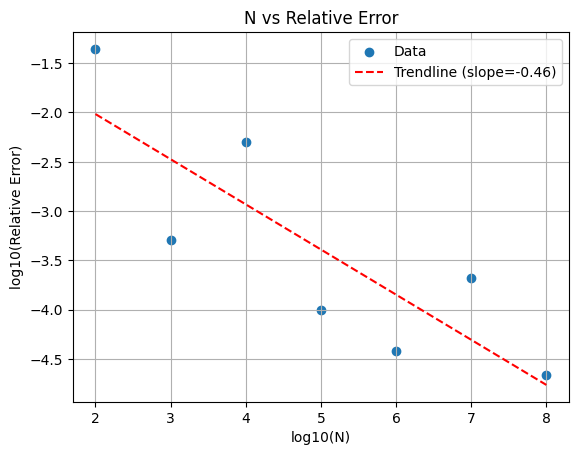

In [10]:
# N vs Error
plot_loglog(N, error, 'N', 'Relative Error', 'N vs Relative Error')


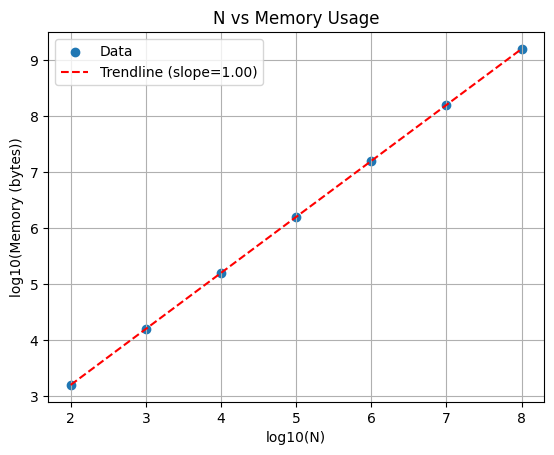

In [11]:
# N vs Memory
plot_loglog(N, memory, 'N', 'Memory (bytes)', 'N vs Memory Usage')

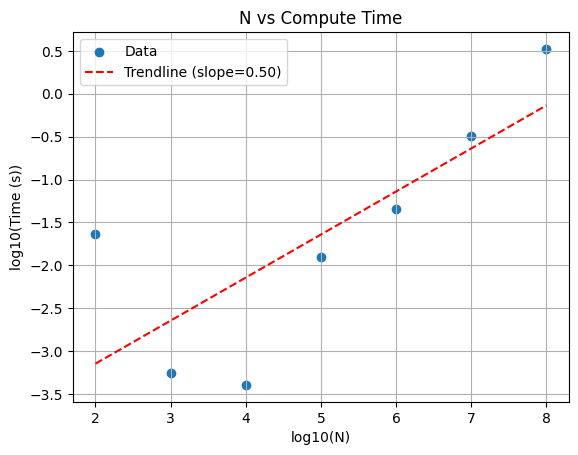

In [12]:
# N vs Time
plot_loglog(N, time_vals, 'N', 'Time (s)', 'N vs Compute Time')

a. Accuracy vs N
Error decreases by ~√10 when N increases 10x. Log-log slope ≈ -0.5 confirms it’s proportional to 1/√N.Its more precise the smaller you get

b. Memory Scaling
Memory scales linearly with N (slope estimated 1 in log-log). The linear growth was predictable due to the storing 2N floats (Memory = 16*N bytes)

c. Compute Time
Time scales linearly for N and seems like the slope is 1.